<a href="https://colab.research.google.com/github/Opeyemiiii/opeyemi_python_and_Machine-learning_project_portfolio/blob/main/Customer_Segmentation_with_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
customer_data = pd.read_csv("/content/Mall_Customers.csv")
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Looking at the plot below naturally we can group this plot into 5 clusters before feeding it into a machine learning model

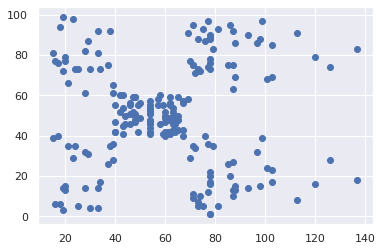

In [ ]:
sns.set()

plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'])
plt.show()

In [ ]:
X = customer_data.iloc[:,[3,4]].values

In [ ]:
X

We need to understand that we must set a k value, by iterating the value between 1 to 10..literally Wcss is squaring the distance between the datapoint and centroid then summing it up across each clusters

In [ ]:
Wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 20)
  kmeans.fit(X)

  Wcss.append(kmeans.inertia_)

In [ ]:
Wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30566.45113025185,
 26127.94644929539,
 21818.114588452176,
 19657.78360870395]

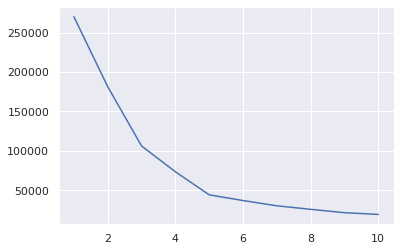

In [ ]:
sns.set()

plt.plot(range(1,11), Wcss)
plt.show()

The above plot we are using a elbow technique. basicaly we need a low wcss and k cluster, unfortunately as wcss decreases clusters increases, we then have to settle for a elbow method where we have the last significant drop in our in the plot. The above chart the last significant drop is at 5, for this project we can say k is 5

Now let train the data set

In [ ]:
KMEans = KMeans(n_clusters= 5, init = "k-means++", random_state= 20)
Y = KMEans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 2 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [ ]:
Y = pd.DataFrame(Y, columns = ['Classified Values'])
Y.head()

,Classified Values
0,3
1,4
2,3
3,4
4,3


In [ ]:
Y.shape

(200, 1)

In [ ]:
output = pd.concat([customer_data, Y], axis = 1)
output.reset_index(drop = True, inplace = True)
output.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Classified Values
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [ ]:
customer_data['classfied_Values'] = Y
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),classfied_Values
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0
199,200,Male,30,137,83,1


In [ ]:
centroid = KMEans.cluster_centers_
centroid

array([[88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

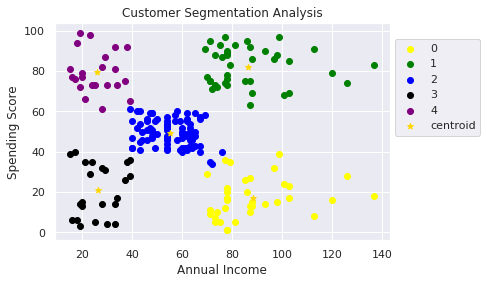

In [ ]:
customer_data1 = customer_data[customer_data.classfied_Values == 0]
customer_data2 = customer_data[customer_data.classfied_Values == 1]
customer_data3 = customer_data[customer_data.classfied_Values == 2]
customer_data4 = customer_data[customer_data.classfied_Values == 3]
customer_data5 = customer_data[customer_data.classfied_Values == 4]

plt.scatter(customer_data1['Annual Income (k$)'], customer_data1['Spending Score (1-100)'], color = 'Yellow', label = 0)
plt.scatter(customer_data2['Annual Income (k$)'], customer_data2['Spending Score (1-100)'], color = 'Green', label = 1)
plt.scatter(customer_data3['Annual Income (k$)'], customer_data3['Spending Score (1-100)'], color = 'Blue', label = 2)
plt.scatter(customer_data4['Annual Income (k$)'], customer_data4['Spending Score (1-100)'], color = 'Black', label = 3)
plt.scatter(customer_data5['Annual Income (k$)'], customer_data5['Spending Score (1-100)'], color = 'Purple', label = 4)
plt.scatter(centroid[:,[0]], centroid[:,[1]], label = 'centroid', marker = '*', color = 'Gold')

plt.legend(bbox_to_anchor = (1.0, 0.95))
plt.title('Customer Segmentation Analysis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

The chart above visualize the segmentation of the customers on the bases of the datapoint x and y axis. they are grouped in clusters of 5 on the bases of there centroid. literarilly datapoint closer to a particular centroid are grouped in the same culster, group, team or whatever..